# Yulu Case study

# About Yulu
Yulu is India’s leading micro-mobility service provider, which offers unique vehicles for the daily commute. Starting off as a mission to eliminate traffic congestion in India, Yulu provides the safest commute solution
through a user-friendly mobile app to enable shared, solo and sustainable commuting.

# Buisness Problem
Yulu seeks to identify the key variables that significantly impact the demand for shared electric cycles in India. Additionally, they aim to assess the effectiveness of these variables in describing the fluctuations in electric cycle demand. By addressing these questions, Yulu aims to gain insights that will inform strategic decisions to enhance their market position and revenue performance.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
!wget https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089

--2024-05-09 14:01:20--  https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089
Resolving d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)... 3.162.130.14, 3.162.130.97, 3.162.130.189, ...
Connecting to d2beiqkhq929f0.cloudfront.net (d2beiqkhq929f0.cloudfront.net)|3.162.130.14|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 648353 (633K) [text/plain]
Saving to: ‘bike_sharing.csv?1642089089.3’

bike_sharing.csv?16 100%[===================>] 633.16K  2.17MB/s    in 0.3s    

2024-05-09 14:01:20 (2.17 MB/s) - ‘bike_sharing.csv?1642089089.3’ saved [648353/648353]



In [ ]:
data = pd.read_csv('bike_sharing.csv?1642089089')

In [ ]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


# Column Profiling:
- **datetime**: datetime
- **season**: season (1: spring, 2: summer, 3: fall, 4: winter)
- **holiday**: whether day is a holiday or not
- **workingday**: if day is neither weekend nor holiday is 1, otherwise is 0.
- **weather**:
  - 1: Clear, Few clouds, partly cloudy, partly cloudy
  - 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
  - 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
  - 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog
- **temp**: temperature in Celsius
- **atemp**: feeling temperature in Celsius
- **humidity**: humidity
- **windspeed**: wind speed
- **casual**: count of casual users
- **registered**: count of registered users
- **count**: count of total rental bikes including both casual and registered

# Basic Analysis

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [ ]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [ ]:
data.shape

(10886, 12)

In [ ]:
data.isnull().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
casual        0
registered    0
count         0
dtype: int64

In [ ]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


- There isn't any column with a null value.

# Making changes to the data by introducing new columns with categorization.

## Adding a new column to denote the season corresponding to its index.



In [ ]:
data['season_name'] = 'Unknown'
data.loc[data['season'] == 1, 'season_name'] = 'Spring'
data.loc[data['season'] == 2, 'season_name'] = 'Summer'
data.loc[data['season'] == 3, 'season_name'] = 'Fall'
data.loc[data['season'] == 4, 'season_name'] = 'Winter'

In [ ]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_name
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Spring
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Spring
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Spring
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Spring
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Winter
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Winter
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Winter
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Winter


## Adding a new column to indicate whether the day is classified as a working day or a holiday.

In [ ]:
data['day'] = 'Holiday'
data.loc[data['workingday'] == 1, 'day'] = 'Working Day'

In [ ]:
data

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_name,day
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16,Spring,Holiday
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40,Spring,Holiday
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32,Spring,Holiday
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13,Spring,Holiday
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1,Spring,Holiday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,Winter,Working Day
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,Winter,Working Day
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,Winter,Working Day
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,Winter,Working Day


## Dropping unnecessary tables.

In [ ]:
data.drop('season',axis = 1, inplace = True)
data.drop('workingday',axis = 1, inplace = True)
data.drop('holiday',axis = 1,inplace = True)
# data.drop('Working_day',axis = 1,inplace = True)

In [ ]:
data

,datetime,weather,temp,atemp,humidity,windspeed,casual,registered,count,season_name,day
0,2011-01-01 00:00:00,1,9.84,14.395,81,0.0000,3,13,16,Spring,Holiday
1,2011-01-01 01:00:00,1,9.02,13.635,80,0.0000,8,32,40,Spring,Holiday
2,2011-01-01 02:00:00,1,9.02,13.635,80,0.0000,5,27,32,Spring,Holiday
3,2011-01-01 03:00:00,1,9.84,14.395,75,0.0000,3,10,13,Spring,Holiday
4,2011-01-01 04:00:00,1,9.84,14.395,75,0.0000,0,1,1,Spring,Holiday
...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,1,15.58,19.695,50,26.0027,7,329,336,Winter,Working Day
10882,2012-12-19 20:00:00,1,14.76,17.425,57,15.0013,10,231,241,Winter,Working Day
10883,2012-12-19 21:00:00,1,13.94,15.910,61,15.0013,4,164,168,Winter,Working Day
10884,2012-12-19 22:00:00,1,13.94,17.425,61,6.0032,12,117,129,Winter,Working Day


# Univariate Analysis

## Analyzing the distribution of numerical variables.



### temp

<Axes: xlabel='temp'>

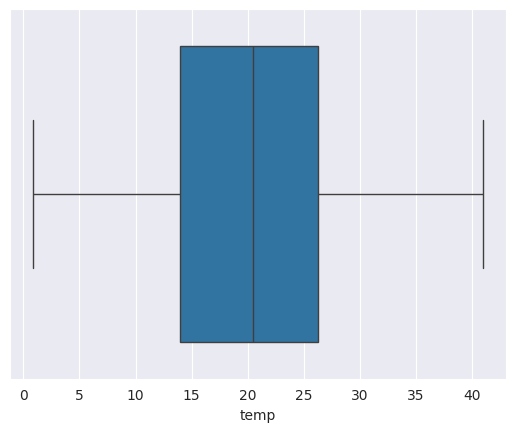

In [ ]:
sns.boxplot(data['temp'],orient='h')

There are no outliers detected in the temperature column.

<Axes: xlabel='temp', ylabel='Density'>

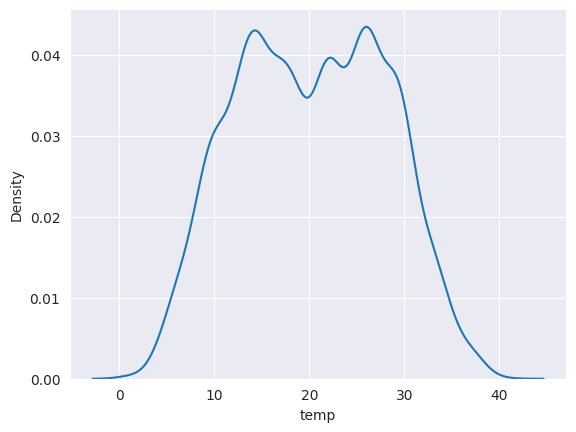

In [ ]:
sns.kdeplot(data = data,x = 'temp')

### atemp

<Axes: xlabel='atemp'>

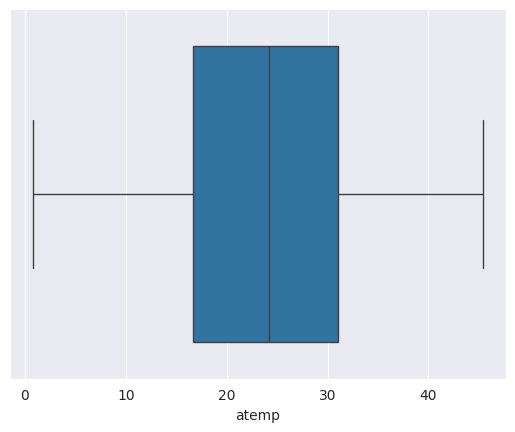

In [ ]:
sns.boxplot(data['atemp'],orient='h')

There are no outliers detected in the atemp column.

<Axes: xlabel='atemp', ylabel='Density'>

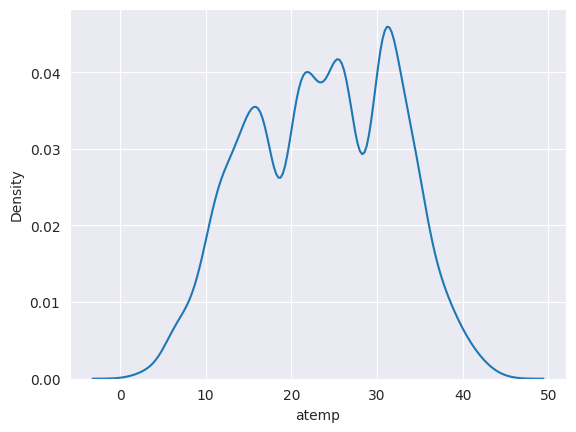

In [ ]:
sns.kdeplot(data = data, x = 'atemp')

### humidity

<Axes: xlabel='humidity'>

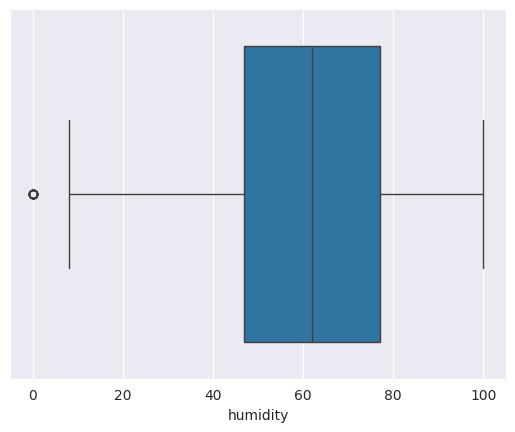

In [ ]:
sns.boxplot(data['humidity'],orient='h')

There is only **one** outlier observed in the humidity column.

<Axes: xlabel='humidity', ylabel='Density'>

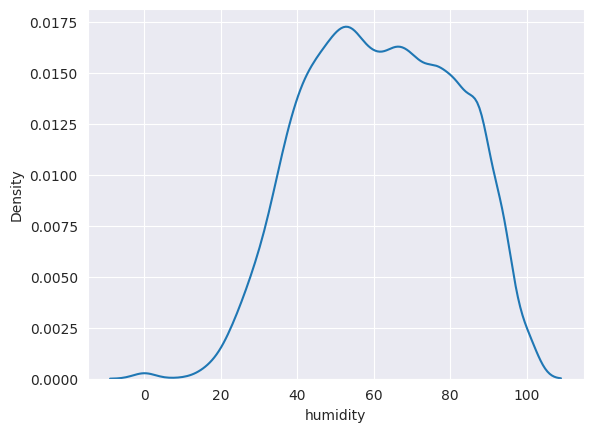

In [ ]:
sns.kdeplot(data = data, x = 'humidity')

### windspeed

<Axes: xlabel='windspeed'>

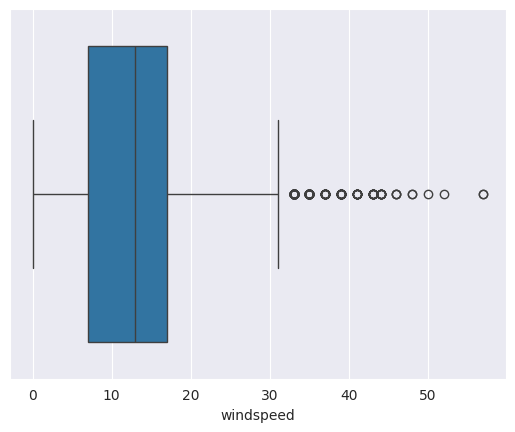

In [ ]:
sns.boxplot(data['windspeed'],orient='h')

In [ ]:
q1,q3 = np.quantile(data['windspeed'],0.25),np.quantile(data['windspeed'],0.75)
IQR = q3 - q1
w1,w2 = q1 - (1.5 * IQR),q3 + (1.5 * IQR)
outliers = data[(data['windspeed'] < w1) | (data['windspeed'] > w2)]
len(outliers)

227

There are  **227** outlier observed in the windspeed column.

<Axes: xlabel='windspeed', ylabel='Density'>

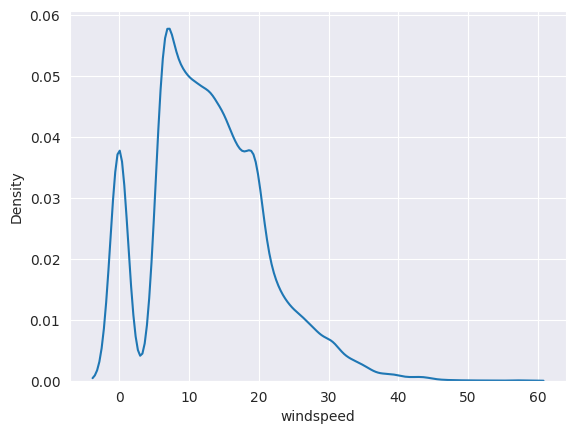

In [ ]:
sns.kdeplot(data = data, x = 'windspeed')

### registered

<Axes: xlabel='registered'>

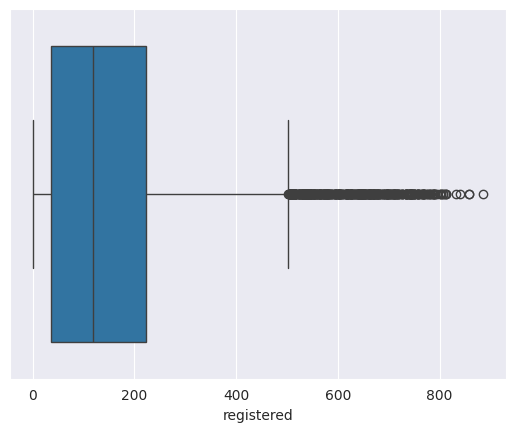

In [ ]:
sns.boxplot(data['registered'],orient='h')

In [ ]:
q1,q3 = np.quantile(data['registered'],0.25),np.quantile(data['registered'],0.75)
IQR = q3 - q1
w1,w2 = q1 - (1.5 * IQR),q3 + (1.5 * IQR)
outliers = data[(data['registered'] < w1) | (data['registered'] > w2)]
len(outliers)

423

There are  **423** outlier observed in the registered column.

<Axes: xlabel='registered', ylabel='Density'>

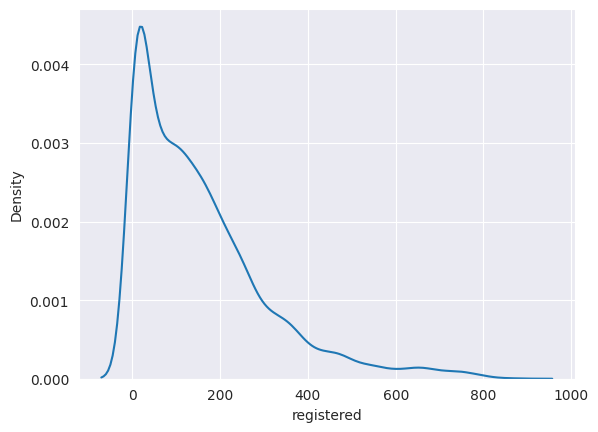

In [ ]:
sns.kdeplot(data = data, x = 'registered')

### count

<Axes: xlabel='count'>

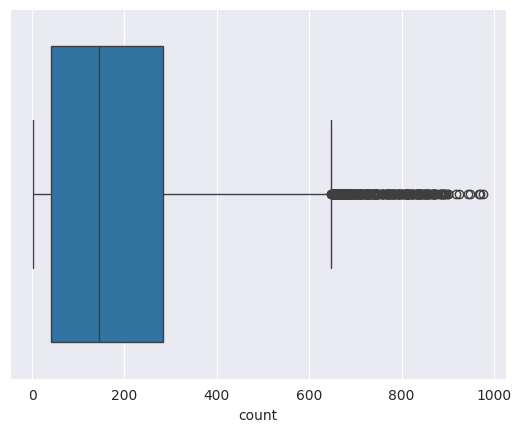

In [ ]:
sns.boxplot(data['count'],orient='h')

In [ ]:
q1,q3 = np.quantile(data['count'],0.25),np.quantile(data['count'],0.75)
IQR = q3 - q1
w1,w2 = q1 - (1.5 * IQR),q3 + (1.5 * IQR)
outliers = data[(data['count'] < w1) | (data['count'] > w2)]
len(outliers)

300

There are  **300** outlier observed in the count column.

<Axes: xlabel='count', ylabel='Density'>

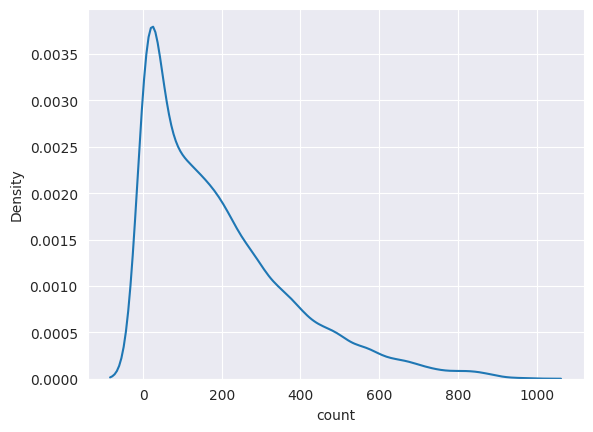

In [ ]:
sns.kdeplot(data = data, x = 'count')

## Analyzing the distribution of categorical variables.

### season

In [ ]:
data['season_name'].value_counts()

season_name
Winter    2734
Summer    2733
Fall      2733
Spring    2686
Name: count, dtype: int64

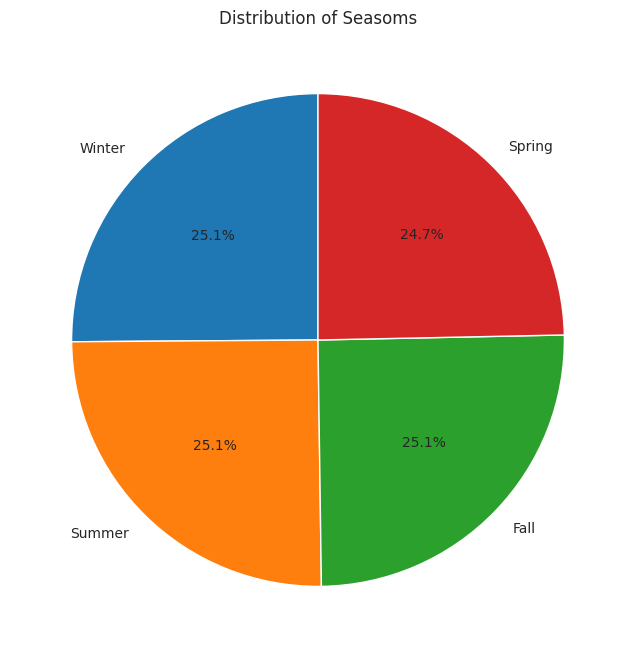

In [ ]:
seasons = data['season_name'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(seasons , labels = seasons.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Seasoms') #title
plt.show()

<Axes: xlabel='season_name', ylabel='count'>

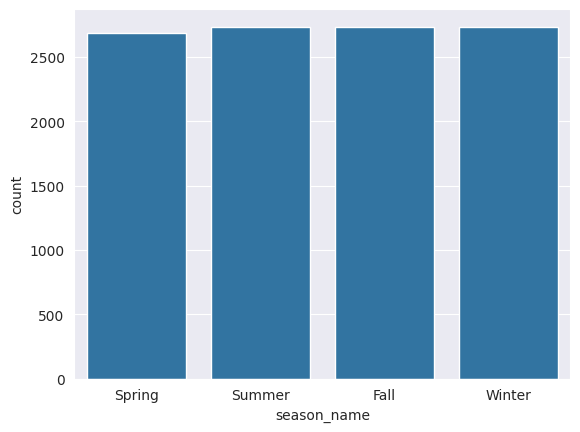

In [ ]:
sns.countplot(data = data, x = 'season_name')

### weather

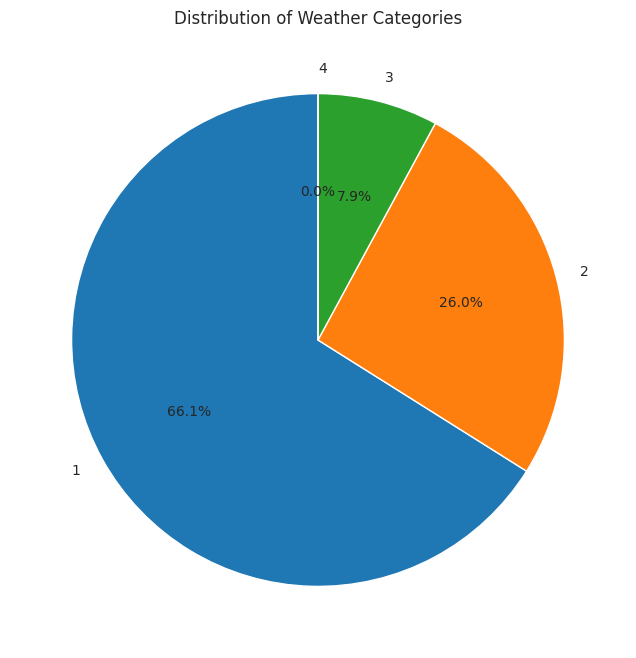

In [ ]:
weather = data['weather'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(weather, labels=weather.index.map(str), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Weather Categories') #title
plt.show()

<Axes: xlabel='weather', ylabel='count'>

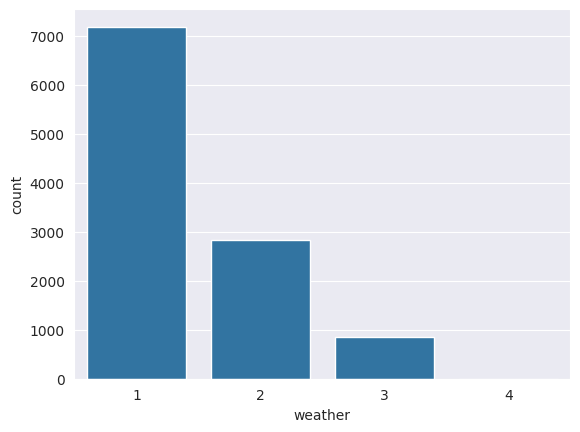

In [ ]:
sns.countplot(data = data, x = 'weather')

### day

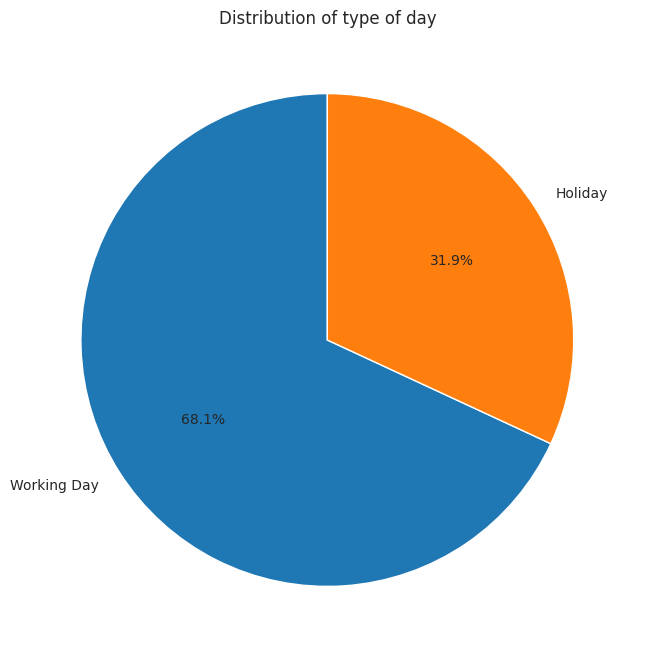

In [ ]:
day = data['day'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(day, labels=day.index.map(str), autopct='%1.1f%%', startangle=90)
plt.title('Distribution of type of day') #title
plt.show()

<Axes: xlabel='day', ylabel='count'>

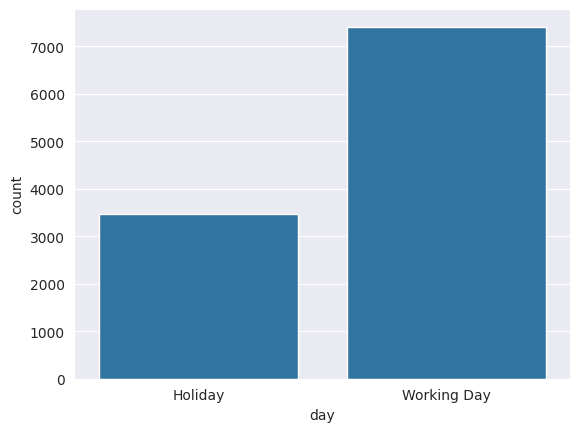

In [ ]:
sns.countplot(data = data, x = 'day')

# Bivariate Analysis

## type of day

<ipython-input-137-54a9e4e3e48b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='day', y='count', data=data, palette=palette)


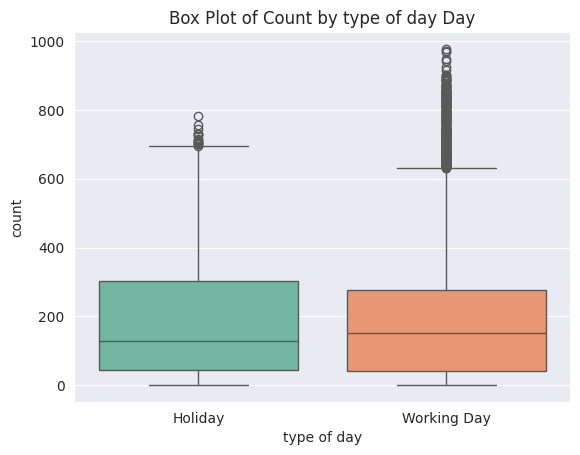

In [ ]:
palette = 'Set2'
sns.boxplot(x='day', y='count', data=data, palette=palette)
plt.xlabel('type of day')
plt.ylabel('count')
plt.title('Box Plot of Count by type of day Day')
plt.show()

Observations:

- Typically, there are more electric cycles rented on weekdays than on holidays.
- The higher occurrence of outliers in the rental count distribution on weekdays implies a greater variability or presence of extreme values in rentals during these days.
- The elevated median on weekdays indicates a higher demand or usage of shared electric cycles during weekdays, possibly due to commuting needs and routine travel.
- Holidays may display more consistent or predictable rental patterns, with fewer extreme deviations from the average.
- Utilizing a 2-sample t-test can help determine the impact of working days on the number of bikes rented.

<ipython-input-138-f995acae613f>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day', y='count', data=data, palette=palette)


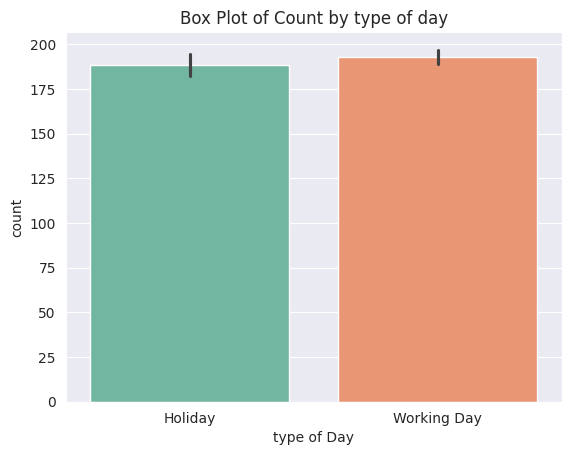

In [ ]:
palette = 'Set2'
sns.barplot(x='day', y='count', data=data, palette=palette)
plt.xlabel('type of Day')
plt.ylabel('count')
plt.title('Box Plot of Count by type of day')
plt.show()

## season

<ipython-input-139-f17527d16d3b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season_name', y = 'count', data=data, palette=palette)


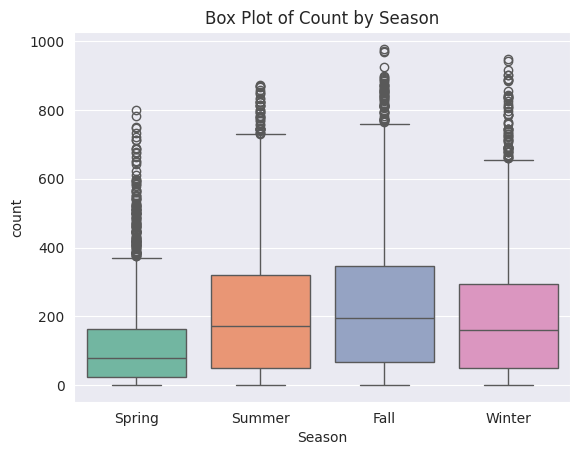

In [ ]:
palette = 'Set2'
sns.boxplot(x='season_name', y = 'count', data=data, palette=palette)
plt.xlabel('Season')
plt.ylabel('count')
plt.title('Box Plot of Count by Season')
plt.show()

Observations:

- The median count for Spring is the highest among all seasons.
- This implies that, on average, the demand for shared electric cycles is highest during the Fall season, followed by Winter, Summer, and then Spring.
- The ascending order of outliers also follows the sequence of Spring having the most outliers, followed by Winter, Summer, and Fall.
- Spring exhibits more extreme variations or unusually high/low rental counts compared to other seasons.
- The observed seasonal order of medians and outliers indicates distinct patterns in demand for shared electric cycles throughout the year.
- Fall appears to be a peak season for rentals, likely influenced by pleasant weather and outdoor activities.
- Winter and Summer follow with moderate demand, possibly influenced by weather conditions and seasonal factors.
- Spring shows the lowest demand, which could be attributed to transitional weather or other seasonal factors.

<ipython-input-140-e9e816fdc8ce>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='season_name', y='count', data=data, palette=palette)


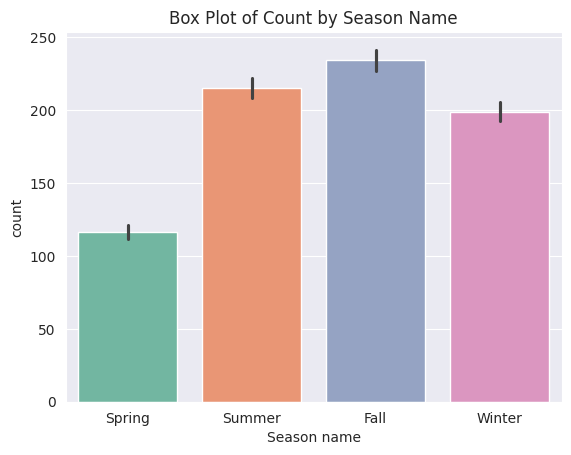

In [ ]:
palette = 'Set2'
sns.barplot(x='season_name', y='count', data=data, palette=palette)
plt.xlabel('Season name')
plt.ylabel('count')
plt.title('Box Plot of Count by Season Name')
plt.show()

Observations

- Fall shows the highest peak in rental counts.
- This suggests the presence of unique seasonal factors driving increased demand during this period.
- Potential factors may include specific events, holidays, or weather conditions characteristic of the Fall season.

## weather

<ipython-input-141-d71282b1514a>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weather', y = 'count', data=data, palette=palette)


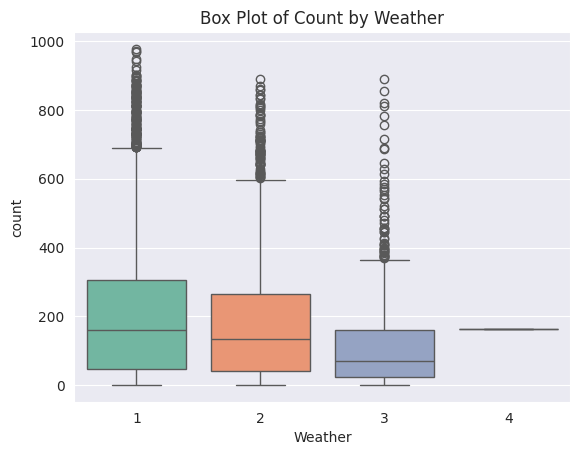

In [ ]:
palette = 'Set2'
sns.boxplot(x='weather', y = 'count', data=data, palette=palette)
plt.xlabel('Weather')
plt.ylabel('count')
plt.title('Box Plot of Count by Weather')
plt.show()

Observations

- Median counts across different weather types follow a distinct pattern, with Type 1 having the highest median count, followed by Type 2 and then Type 3.
- This suggests that weather Type 1 conditions are associated with the highest demand for shared electric cycles, followed by Type 2 and Type 3.
- Weather Type 1 likely represents favorable or optimal conditions that encourage increased usage of micro-mobility services.
- Type 2 and Type 3 conditions may still attract moderate usage but to a lesser extent compared to Type 1.
- A median count of 0 for Weather Type 4 indicates that this weather condition is not conducive to rental activity or usage of shared electric cycles.
- Weather Type 4 represents extreme or unfavorable conditions like heavy rain, ice pellets, and thunderstorms, which deter users from utilizing micro-mobility services entirely.

<ipython-input-142-d9c986c67ef4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weather', y = 'count', data=data, palette=palette)


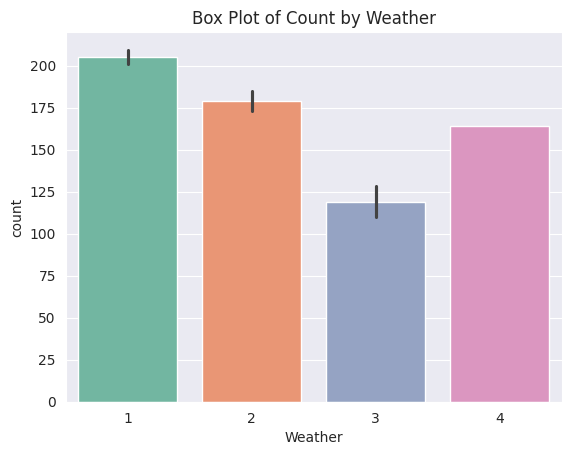

In [ ]:
palette = 'Set2'
sns.barplot(x='weather', y = 'count', data=data, palette=palette)
plt.xlabel('Weather')
plt.ylabel('count')
plt.title('Box Plot of Count by Weather')
plt.show()

# Hypothesis Testing

## **2- Sample T-Test** to check if Working Day has an effect on the number of electric cycles rented

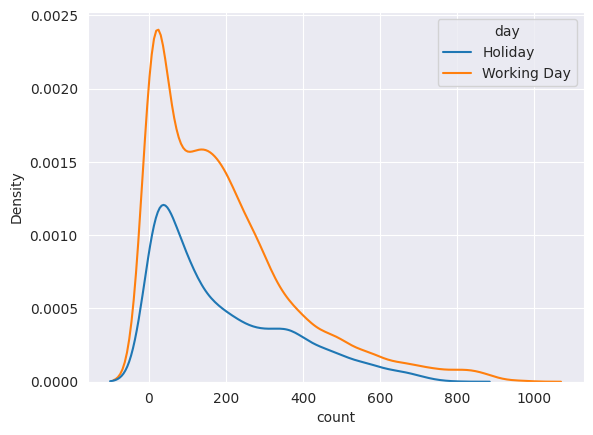

In [ ]:
sns.kdeplot(data = data, x="count", hue="day")
plt.show()

**Null Hypothesis** (H0): Working day has no effect on the number of cycles being rented.

**Alternate Hypothesis** (H1): Working day has effect on the number of cycles being rented.

**Significance level** (alpha): 0.05

We will use the 2-Sample T-Test to test the hypothess defined above

Assumptions:
- Random Sampling: We selected 30 random samples from the population data.
- Independence: The data points are independent of each other.
- Normality: Since we are testing means and our sample size is 30, according to the Central Limit Theorem (CLT), we can infer that the sample means of the data are normally distributed.
- Equal Variances: We will presume that the variances are approximately equal.

In [ ]:
s1 = np.random.choice(data[data['day'] == 'Working Day']['count'].values, 30)
s2 = np.random.choice(data[data['day'] == 'Holiday']['count'].values, 30)

In [ ]:
t_stat, pval = ttest_ind(s1, s2, alternative="two-sided")
print("T-statistic:", t_stat)
print("P-value:", pval)

T-statistic: -0.2148628313581953
P-value: 0.8306279683380138


In [ ]:
alpha = 0.05
if pval >= alpha:
    print("Fail to reject null hypothesis. Working Day does not have an effect on the number of electric cycles rented.")
else:
    print("Reject null hypothesis. Working Day has an effect on the number of electric cycles rented.")

Fail to reject null hypothesis. Working Day does not have an effect on the number of electric cycles rented.


### **Conclusion:**

Based on the test results, it appears that the day's status (working day or not) does not exert a statistically significant influence on the number of electric cycles rented.


## **ANNOVA** to check if No. of cycles rented is similar or different in different 1. weather 2. season

### 1. weather

<ipython-input-147-90600d6a5ca4>:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data = data, x="count", hue="weather")


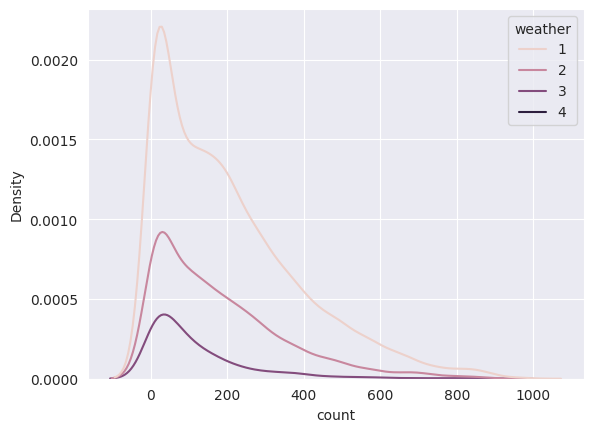

In [ ]:
sns.kdeplot(data = data, x="count", hue="weather")
plt.show()

Based on the graph above, it is evident that the data does not follow a normal distribution and instead resembles an F distribution.

**Null Hypothesis** (H0): The number of cycles rented is consistent across different weather conditions.

**Alternative Hypothesis** (H1): The number of cycles rented varies across different weather conditions.

In [ ]:
data_1 = data[data['weather'] == 1]['count'].values
data_2 = data[data['weather'] == 2]['count'].values
data_3 = data[data['weather'] == 3]['count'].values
data_4 = data[data['weather'] == 4]['count'].values

Assumptions:

- Independence: The data points are independent of each other.
- Normality: We can assess the normality of the data using QQ-Plots or the Shapiro-Wilk Test, with a significance level of 0.05.
- Equal Variances: We will presume that the variances are approximately equal.

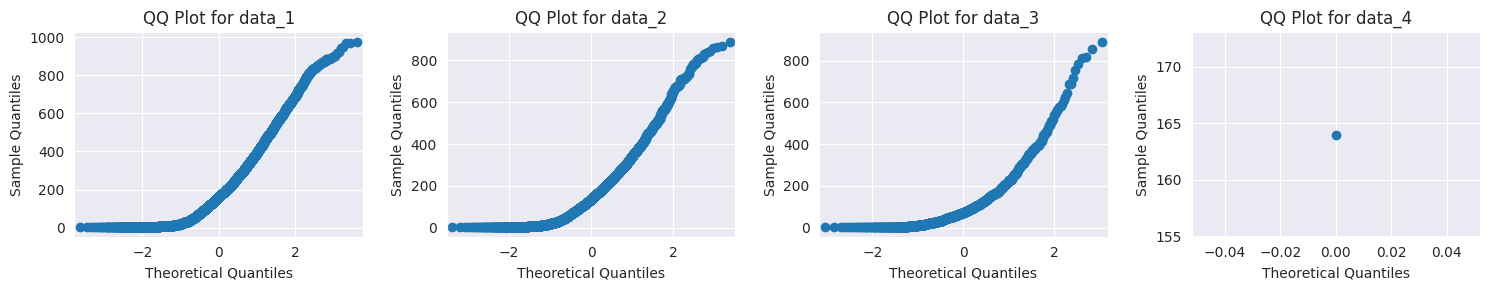

In [ ]:
fig, axs = plt.subplots(1, 4, figsize=(15, 3))
for i, data in enumerate([data_1, data_2, data_3, data_4]):
    qqplot(data, ax=axs[i])
    axs[i].set_title(f"QQ Plot for data_{i+1}")

plt.tight_layout()
plt.show()

The graphs provide additional evidence suggesting that the data is not normally distributed. We will confirm this by conducting the Shapiro-Wilk Test.

In [ ]:
# Define a dictionary to store the data and weather types
weather_data = {
    "Weather 1": data_1,
    "Weather 2": data_2,
    "Weather 3": data_3
}

# Perform Shapiro-Wilk test for each weather type
for weather, data in weather_data.items():
    stat, p_value = shapiro(data)
    print(f"Shapiro-Wilk Test for {weather}:")
    print("Test Statistic:", stat)
    print("p-value:", p_value)
    print("Data is normally distributed" if p_value > 0.05 else "Data is not normally distributed")
    print()

# Not performing for Weather 4 as it only contains 1 data point


Shapiro-Wilk Test for Weather 1:
Test Statistic: 0.8909230828285217
p-value: 0.0
Data is not normally distributed

Shapiro-Wilk Test for Weather 2:
Test Statistic: 0.8767687082290649
p-value: 9.781063280987223e-43
Data is not normally distributed

Shapiro-Wilk Test for Weather 3:
Test Statistic: 0.7674332857131958
p-value: 3.876090133422781e-33
Data is not normally distributed



/usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


This verifies that the data does not follow a normal distribution.

In [ ]:
def conduct_anova(data_list, significance_level=0.05):
    """
    Perform ANOVA test and display results.

    Parameters:
    - data_list (list of array-like): List of datasets to compare.
    - significance_level (float): Desired significance level (default is 0.05).
    """
    f_statistic, p_value = f_oneway(*data_list)

    print("ANOVA Results:")
    print("F-Statistic:", f_statistic)
    print("P-value:", p_value)

    if p_value < significance_level:
        print("\nReject the null hypothesis.")
        print("The number of cycles rented differs across different weather types.")
    else:
        print("\nFail to reject the null hypothesis.")
        print("The number of cycles rented is similar across different weather types.")

# Invoking the function with the data list
conduct_anova([data_1, data_2, data_3, data_4])


ANOVA Results:
F-Statistic: 65.53024112793271
P-value: 5.482069475935669e-42

Reject the null hypothesis.
The number of cycles rented differs across different weather types.


Conclusion

Weather significantly influences the number of cycles rented, as evidenced by the fact that the number of cycles rented varies across different weather conditions.

### season

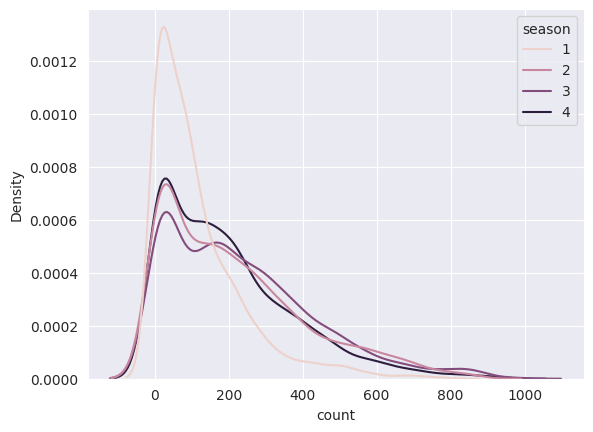

In [ ]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
sns.kdeplot(data = data, x="count", hue="season")
plt.show()

The data appears to deviate from a normal distribution.

**Null Hypothesis** (H0): The number of cycles rented is consistent across different seasons.

**Alternative Hypothesis** (H1): The number of cycles rented varies across different seasons.

In [ ]:
data_1 = data[data['season'] == 1]['count'].values
data_2 = data[data['season'] == 2]['count'].values
data_3 = data[data['season'] == 3]['count'].values
data_4 = data[data['season'] == 4]['count'].values

Assumptions:

- Independence: The data points are independent of each other.
- Normality: We can assess the normality of the data using QQ-Plots or the Shapiro-Wilk Test, with a significance level of 0.05.
- Equal Variances: We will assume that the variances of the data are equal.

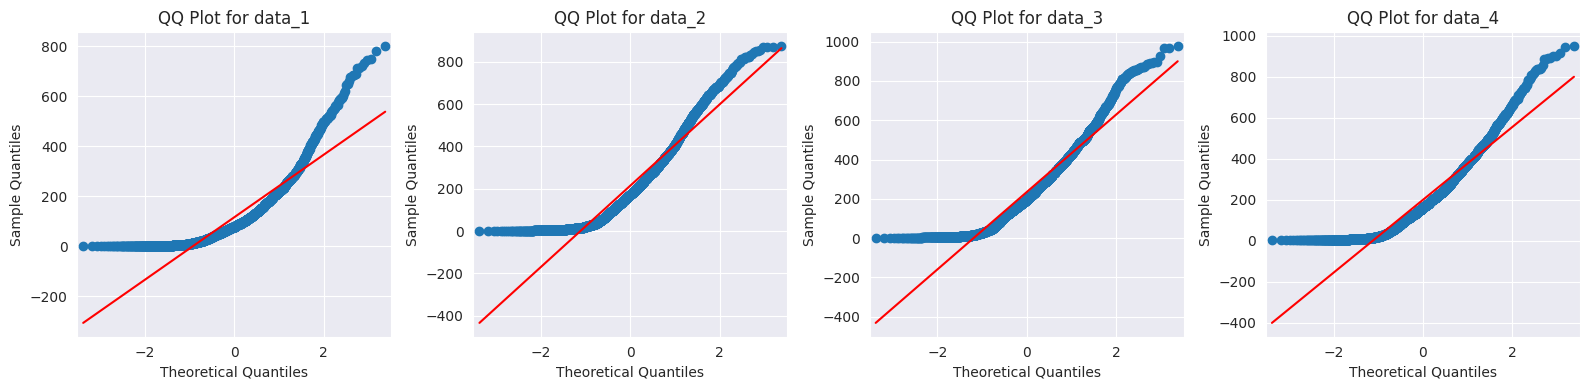

In [ ]:
# test for normality

fig, axs = plt.subplots(1, 4, figsize=(16, 4))

qqplot(data_1, line='s', ax=axs[0])
axs[0].set_title('QQ Plot for data_1')

qqplot(data_2, line='s', ax=axs[1])
axs[1].set_title('QQ Plot for data_2')

qqplot(data_3, line='s', ax=axs[2])
axs[2].set_title('QQ Plot for data_3')

qqplot(data_4, line='s', ax=axs[3])
axs[3].set_title('QQ Plot for data_4')

plt.tight_layout()
plt.show()

The graphs provide additional indication that the data may not follow a normal distribution. To confirm this, we will conduct a Shapiro-Wilk Test.

In [ ]:
data_list = [data_1, data_2, data_3, data_4]
seasons = ["Season 1", "Season 2", "Season 3", "Season 4"]

for season, data in zip(seasons, data_list):
    statistic, p_value = shapiro(data)
    print(f"Shapiro-Wilk Test for {season}:")
    print("Test Statistic:", statistic)
    print("p-value:", p_value)
    print("Data is normally distributed" if p_value > 0.05 else "Data is not normally distributed")
    print()


Shapiro-Wilk Test for Season 1:
Test Statistic: 0.8087388873100281
p-value: 0.0
Data is not normally distributed

Shapiro-Wilk Test for Season 2:
Test Statistic: 0.900481641292572
p-value: 6.039093315091269e-39
Data is not normally distributed

Shapiro-Wilk Test for Season 3:
Test Statistic: 0.9148160815238953
p-value: 1.043458045587339e-36
Data is not normally distributed

Shapiro-Wilk Test for Season 4:
Test Statistic: 0.8954644799232483
p-value: 1.1301682309549298e-39
Data is not normally distributed



The results of the Shapiro-Wilk test indicate that the data does not follow a normal distribution.

In [ ]:
# ANNOVA

def perform_anova(*args, significance_level=0.05):
    f_statistic, p_value = f_oneway(*args)
    print("F-Statistic:", f_statistic)
    print("P-value:", p_value)

    if p_value < significance_level:
        print("\nReject the null hypothesis.")
        print("Number of cycles rented differs across different seasons.")
    else:
        print("\nFail to reject the null hypothesis.")
        print("Number of cycles rented is similar across different seasons.")

# Invoking the function with the data
perform_anova(data_1, data_2, data_3, data_4)


F-Statistic: 236.94671081032106
P-value: 6.164843386499654e-149

Reject the null hypothesis.
Number of cycles rented differs across different seasons.


Conclusion

The season does influence the number of cycles being rented.

## **Chi-square test** to check if Weather is dependent on the season

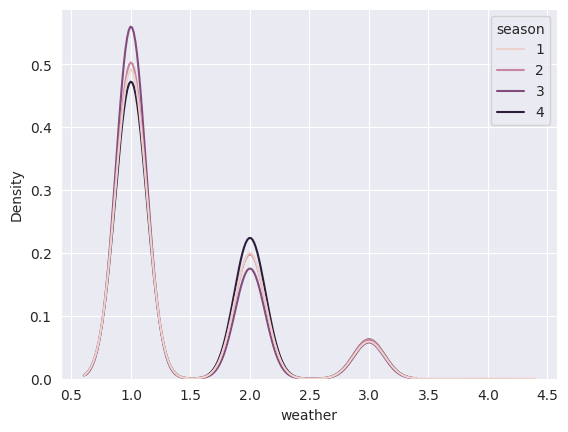

In [ ]:
data = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/428/original/bike_sharing.csv?1642089089")
sns.kdeplot(data = data, x="weather", hue="season")
plt.show()

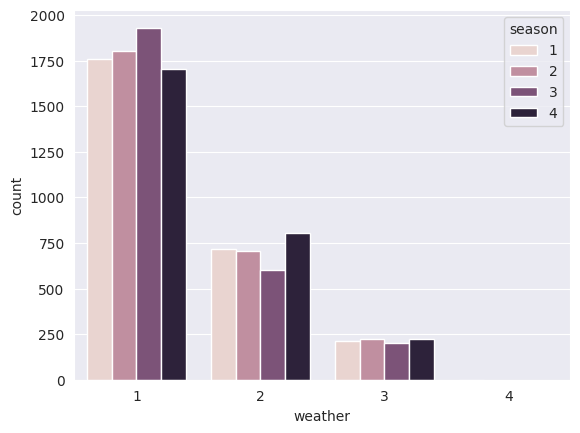

In [ ]:
sns.countplot(data = data, x="weather", hue="season")
plt.show()

In [ ]:
data_table = pd.crosstab(data['season'], data['weather'])
data_table

weather,1,2,3,4
season,,,,
1,1759,715,211,1
2,1801,708,224,0
3,1930,604,199,0
4,1702,807,225,0


**Null Hypothesis** (H0): There is no relationship between weather and season.

**Alternate Hypothesis** (H1): There is a relationship between weather and season.

**Significance level** (alpha): 0.05

We will employ the chi-square test to evaluate the aforementioned hypotheses.

Assumptions:

- Random Sampling: Not required since we have data for the entire population.
- Independence: The data points are independent of each other.
- Sufficient Sample Size: The sample size is not large enough for weather type 4.

In [ ]:
def perform_chi_square_test(data, variable1, variable2, alpha=0.05):
    contingency_table = pd.crosstab(data[variable1], data[variable2])

    chi2_stat, p_val, dof, expected_values = chi2_contingency(contingency_table)

    if p_val <= alpha:
        print(f"\nSince the p-value is less than or equal to the significance level of {alpha},")
        print(f"We reject the Null Hypothesis. This suggests that {variable2} is dependent on {variable1}.")
    else:
        print(f"\nSince the p-value is greater than the significance level of {alpha},")
        print("We fail to reject the Null Hypothesis.")

# Invoking the function with the provided data and variables
perform_chi_square_test(data, 'season', 'weather')



Since the p-value is less than or equal to the significance level of 0.05,
We reject the Null Hypothesis. This suggests that weather is dependent on season.


### Conclusion
weather is dependent on season.

# Insights:
- During the summer and fall seasons, more bikes are rented compared to other seasons.
- Bike rentals increase on holidays.
- More bikes are rented on holidays and weekends compared to working days.
- Rentals decrease during rainy, thunderstorm, snowy, or foggy weather.
- Very few bikes are rented when humidity is less than 20.
- Rentals decrease when the temperature is less than 10.
- Rentals decrease when the windspeed is greater than 35.

# Recommendations:

1. Increase bike inventory during summer and fall seasons to meet the higher demand compared to other seasons.
2. Based on a significance level of 0.05, working days do not significantly affect bike rentals.
3. Decrease bike inventory on days with very low humidity.
4. Reduce bike inventory during very cold days or when the temperature is less than 10 degrees Celsius.
5. Decrease bike inventory during thunderstorms or when the windspeed exceeds 35 km/h.

# Note to evaluator
- colab link : https://colab.research.google.com/drive/1I4Pwzb3oPo-aUuRWdyK3YREEVgoI2K6M?usp=sharing
- Student Name = Sai Venkatesh
- Converted to pdf using https://2pdf.com/convert-ipynb-to-pdf/